In [276]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from os import system
from IPython.display import Image
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

Define the problem and perform Exploratory Data Analysis
- Problem definition
- Check shape, Data types, and statistical summary
- Univariate analysis
- Multivariate analysis
- Use appropriate visualizations to identify the patterns and insights
- Key meaningful observations on individual variables and the relationship between variables

Context

CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

Objective

The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.

In [277]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [278]:
path_excel = "/content/drive/My Drive/Module_6_Machine_Learning_2_Week_4_Project/Election_Data.xlsx"
df = pd.read_excel(path_excel, sheet_name=1)
df


,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...,...
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male


In [279]:
#excel_file_path = 'Election_Data.xlsx'
#df = pd.read_excel(excel_file_path, sheet_name=1)
#df

Perform EDA

Shape

In [280]:
print("Number of rows:",df.shape[0], "\n" "Number of columns are", df.shape[1])

Number of rows: 1525 
Number of columns are 10


Data types

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [282]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print("Categorical variables are:", cat)
print("Numerical variables are: ", num)

Categorical variables are: ['vote', 'gender']
Numerical variables are:  ['Unnamed: 0', 'age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


Statistical Summary

In [283]:
df.describe()

,Unnamed: 0,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,763.000000,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,440.373894,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,382.000000,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,763.000000,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,1144.000000,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,1525.000000,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


1.Unnamed column doesnt contains no information in it, so we can drop the column.
2.The average age of people who comes for voting is 54, i.e ages more likely between 41 to 60 ages peoples who voting are maximum.
3.The political knowledge is as average of 1.54 out of 3.


In [284]:
dfs = df.drop(['Unnamed: 0'],axis=1)
dfs

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [285]:
dfs.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [286]:
dfs.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

Univariate Analysis

In [287]:
dfs['vote'].value_counts()

Labour          1063
Conservative     462
Name: vote, dtype: int64

In [288]:
dfs['gender'].value_counts()

female    812
male      713
Name: gender, dtype: int64

In [289]:
cat_col = dfs.select_dtypes(include= ['object'])
cat_col.columns

Index(['vote', 'gender'], dtype='object')

In [290]:
num_col = dfs.select_dtypes(include= ['int64'])
num_col.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge'],
      dtype='object')

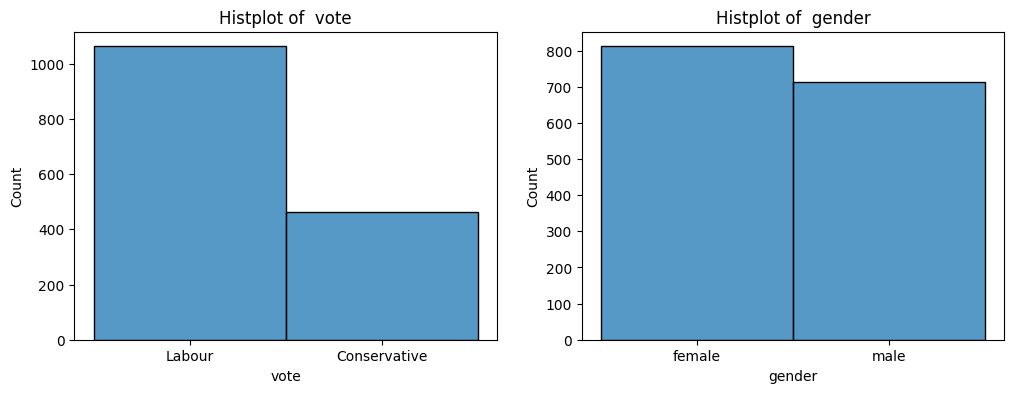

In [291]:
plt.figure(figsize= (12,4))
cat_list = cat_col.columns
for i in range (len(cat_list)):
    plt.subplot(1,2,i+1)
    plt.title('Histplot of  {}'.format(cat_list[i]))
    sns.histplot(data = dfs, x = dfs[cat_list[i]]);


1. compared with labour vote and conservative vote of people, looks like labour vote are majority in nature with 1063 votes and conservative are below 462.
2. voting people gender varies with over 812 female voters and nearly 713 are male voters. compartively males are lesser to vote.

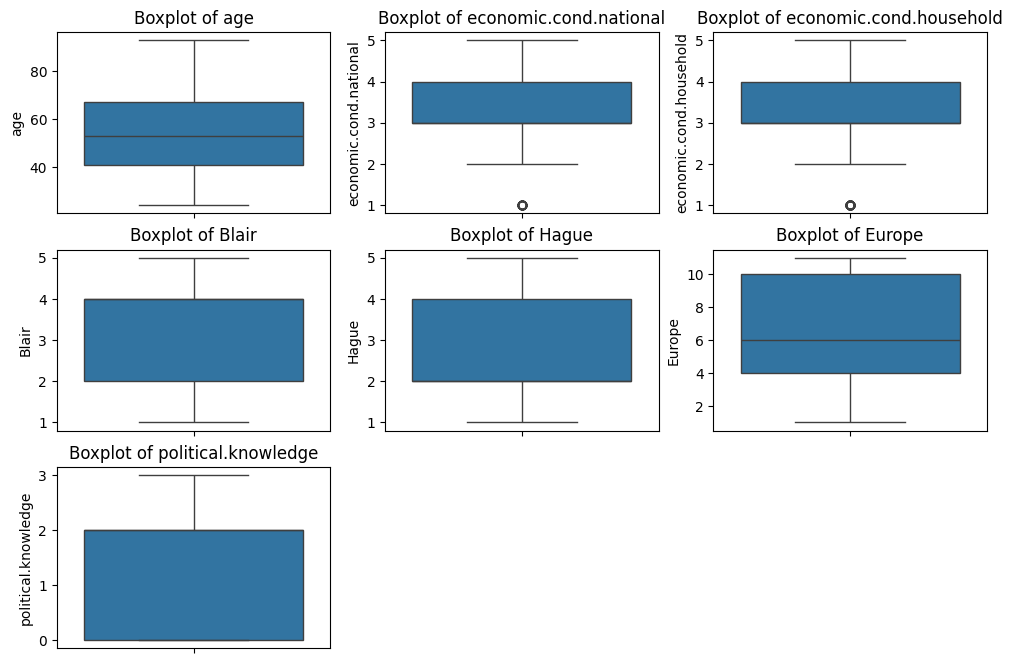

In [292]:
plt.figure(figsize= (12,8))
num_list = num_col.columns
for i in range (len(num_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data = dfs, y = dfs[num_list[i]]);
    plt.title('Boxplot of {}'.format(num_list[i]))

1. As we see from all the numerical plots for the variables, looks there is some little outlier present for economic condition for nation and household. but this outlier will not affect the dataset because of minimum value present in it and it should not be removed also.
2. Outliers are not present for other variables at all. so treating outlier is not recommended.
3. Blair and Hague variables looks similar in data, their mean and 25% and 75% IQR looks similar.
4. political knowledge of people varies from 0 to 3.

Multi-variate Analysis

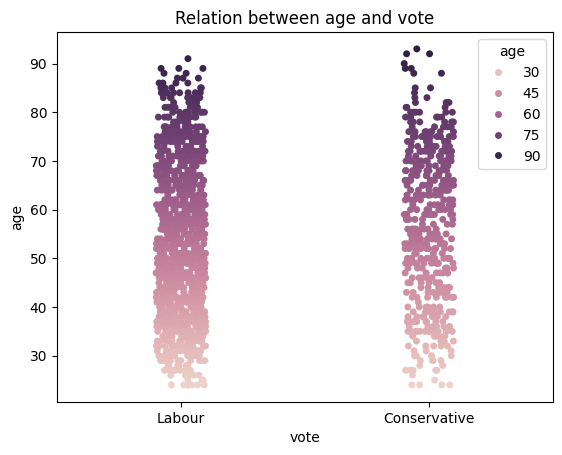

In [293]:
plt.title('Relation between age and vote')
sns.stripplot( x =dfs['vote'], y = dfs['age'],hue = dfs['age'] );

plt.show()

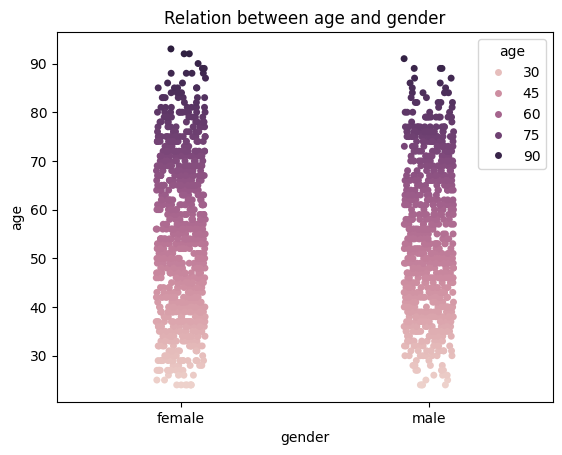

In [294]:
plt.title('Relation between age and gender')
sns.stripplot( x =dfs['gender'], y = dfs['age'],hue = dfs['age'] );

plt.show()

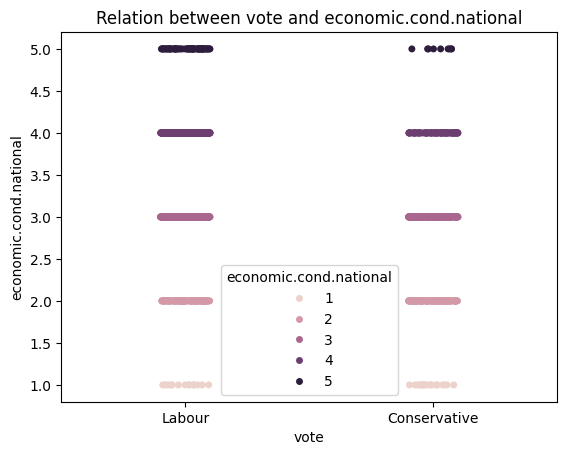

In [295]:
plt.title('Relation between vote and economic.cond.national')
sns.stripplot( x =dfs['vote'], y = dfs['economic.cond.national'],hue = dfs['economic.cond.national'] );

plt.show()

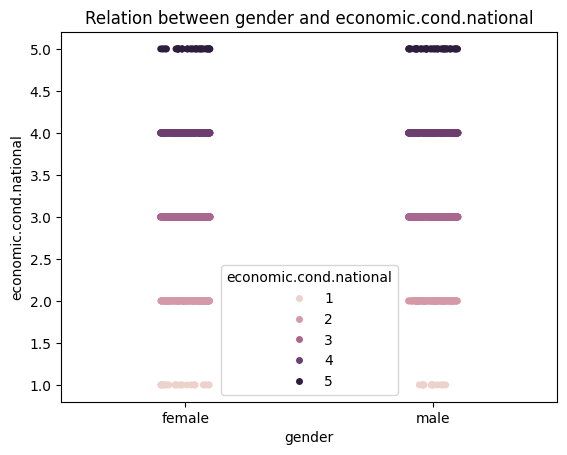

In [296]:
plt.title('Relation between gender and economic.cond.national')
sns.stripplot( x =dfs['gender'], y = dfs['economic.cond.national'],hue = dfs['economic.cond.national'] );

plt.show()

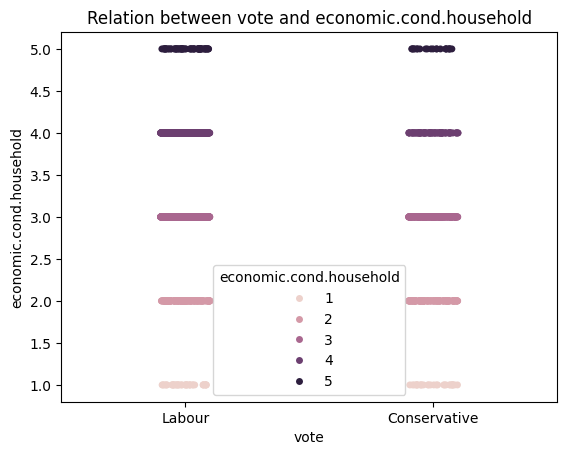

In [297]:
plt.title('Relation between vote and economic.cond.household')
sns.stripplot( x =dfs['vote'], y = dfs['economic.cond.household'],hue = dfs['economic.cond.household'] );

plt.show()

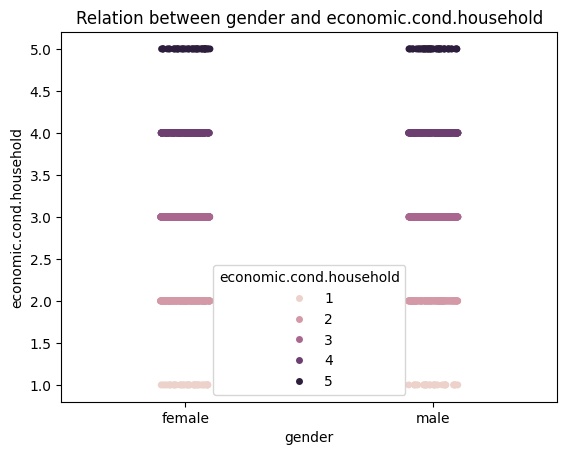

In [298]:
plt.title('Relation between gender and economic.cond.household')
sns.stripplot( x =dfs['gender'], y = dfs['economic.cond.household'],hue = dfs['economic.cond.household'] );

plt.show()

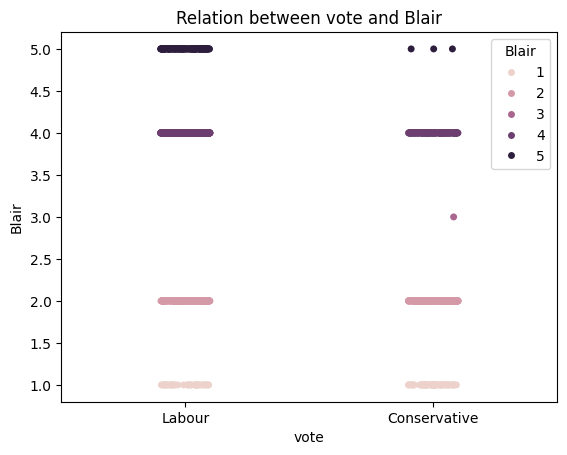

In [299]:
plt.title('Relation between vote and Blair')
sns.stripplot( x =dfs['vote'], y = dfs['Blair'],hue = dfs['Blair'] );

plt.show()

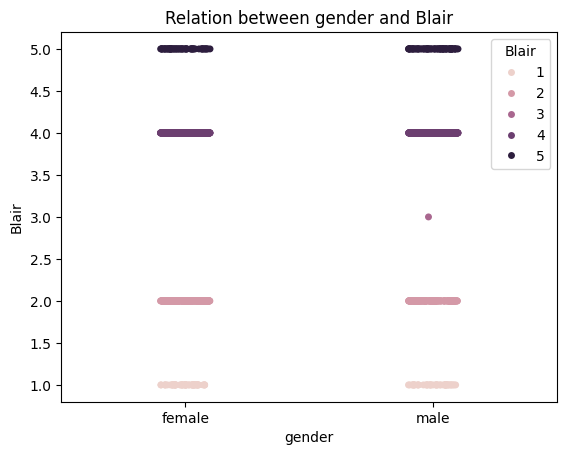

In [300]:
plt.title('Relation between gender and Blair')
sns.stripplot( x =dfs['gender'], y = dfs['Blair'],hue = dfs['Blair'] );

plt.show()

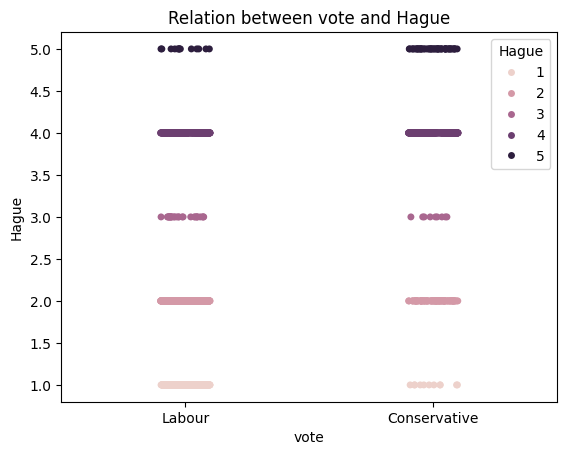

In [301]:
plt.title('Relation between vote and Hague')
sns.stripplot( x =dfs['vote'], y = dfs['Hague'],hue = dfs['Hague'] );

plt.show()

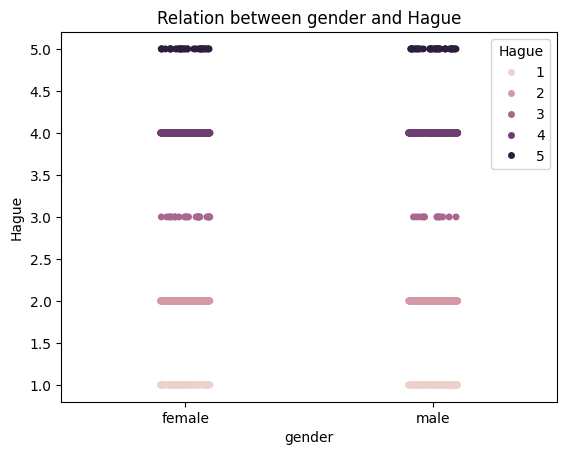

In [302]:
plt.title('Relation between gender and Hague')
sns.stripplot( x =dfs['gender'], y = dfs['Hague'],hue = dfs['Hague'] );

plt.show()

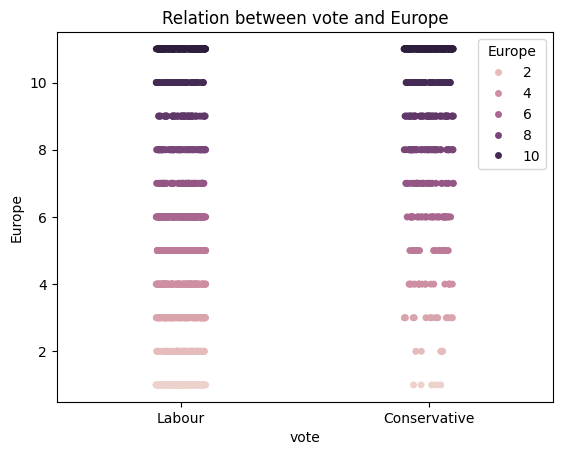

In [303]:
plt.title('Relation between vote and Europe')
sns.stripplot( x =dfs['vote'], y = dfs['Europe'],hue = dfs['Europe'] );

plt.show()

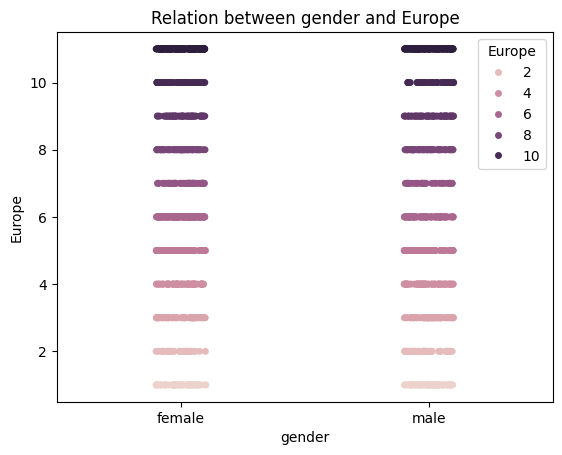

In [304]:
plt.title('Relation between gender and Europe')
sns.stripplot( x =dfs['gender'], y = dfs['Europe'],hue = dfs['Europe'] );

plt.show()

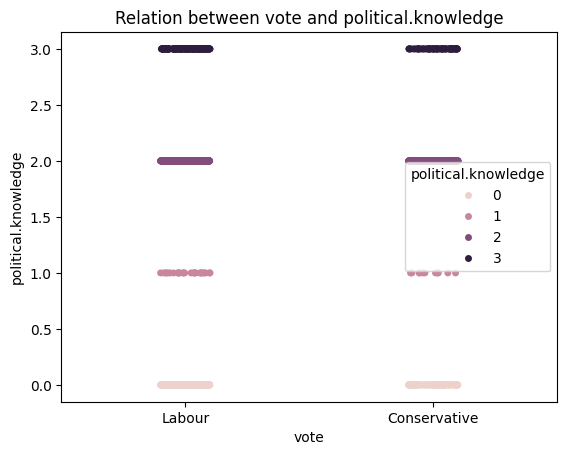

In [305]:
plt.title('Relation between vote and political.knowledge')
sns.stripplot( x =dfs['vote'], y = dfs['political.knowledge'],hue = dfs['political.knowledge'] );

plt.show()

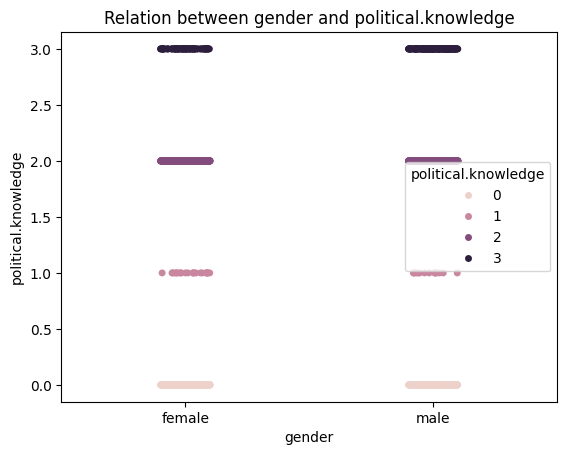

In [306]:
plt.title('Relation between gender and political.knowledge')
sns.stripplot( x =dfs['gender'], y = dfs['political.knowledge'],hue = dfs['political.knowledge'] );

plt.show()

In [307]:
pd.crosstab(dfs['vote'], dfs['gender'] )

gender,female,male
vote,,
Conservative,259,203
Labour,553,510


In [308]:
#sns.pairplot(df)

Key Observations:

1. there are almost same ratio for Labour votes and conservative votes we see that 203 males and 259 females opt for conservative party and 510 male and 553 females are opting for Labour party. so from this people are mostly preferring Labour party to secure majority of seats.
2. similarly male and female voters have almost similar high political knowledge among each others, just a slight difference in male voters have more numbers in 3 ratings.
3. and voters who vote for Labour party have high political knowledge than conservative party.
4. Labour party voters of people are highly in dense with respect to their ages. they range from 25 to 90 also when compared to conservative party.
5. But the conservative party has high voters aged more than 90.nearly 5 to 6 people of age 90 and above vote for conservative party. Among these 90 and above ages are mostly female.
6. Eurosceptic sentiment is high for labour party which ranges average from 0 to 11 points i.e many people has 0respondents also. but for conservative party the low points 0 to 5 are less.
7. Assessment of current national economic conditions, current household economic conditions are high for labour party only when compared with conservative party.

Data Pre-processing

Prepare the data for modelling:
- Outlier Detection(treat, if needed))
- Encode the data
- Data split
- Scale the data (and state your reasons for scaling the features)

Outlier Detection(treat, if needed))

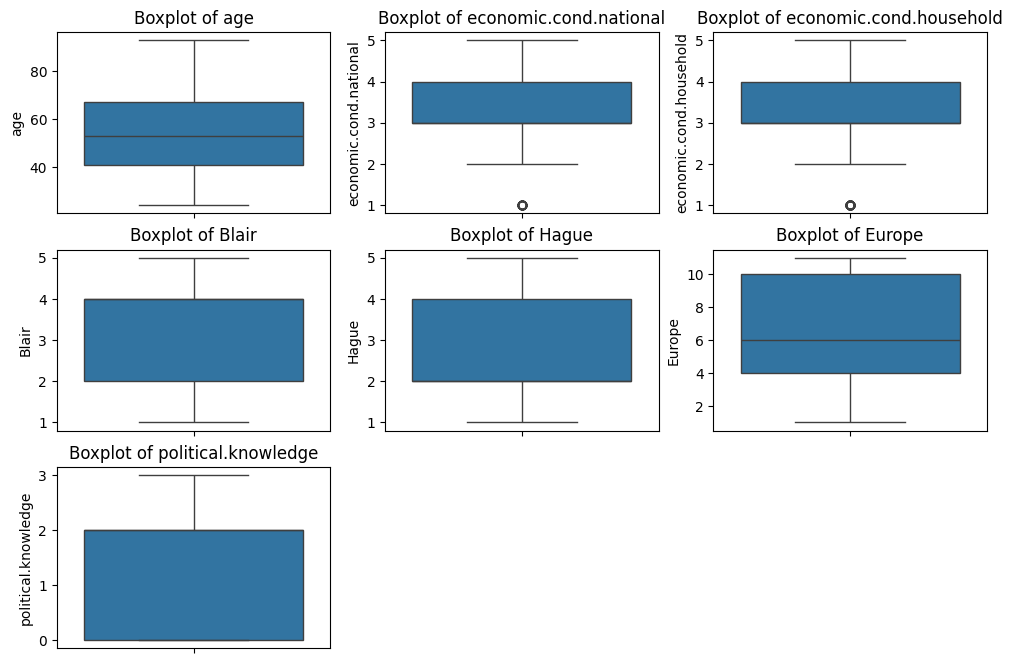

In [309]:
plt.figure(figsize= (12,8))
num_list = num_col.columns
for i in range (len(num_list)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data = dfs, y = dfs[num_list[i]]);
    plt.title('Boxplot of {}'.format(num_list[i]))

As we see there are no much outliers present in the variables other than 2(economic.cond.national and economic.cond.household), so we can ignore to treat them.

Encode the data

As the categorical variables has only 2 values in both(vote and gender) variables i.e. male or female and labour or conservative we prefer to go with label encoding instead of one-hot encoding.

In [310]:
dfs.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [311]:
dfs["vote"] =dfs["vote"].astype('category')
dfs["gender"] =dfs["gender"].astype('category')

In [312]:
dfs["vote"] = dfs["vote"].cat.codes
dfs["gender"] = dfs["gender"].cat.codes
dfs.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


In [313]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   vote                     1525 non-null   int8 
 1   age                      1525 non-null   int64
 2   economic.cond.national   1525 non-null   int64
 3   economic.cond.household  1525 non-null   int64
 4   Blair                    1525 non-null   int64
 5   Hague                    1525 non-null   int64
 6   Europe                   1525 non-null   int64
 7   political.knowledge      1525 non-null   int64
 8   gender                   1525 non-null   int8 
dtypes: int64(7), int8(2)
memory usage: 86.5 KB


Data split

In [314]:
dfs.groupby(['vote']).count()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
vote,,,,,,,,
0,462,462,462,462,462,462,462,462
1,1063,1063,1063,1063,1063,1063,1063,1063


out of 1525 voters there are 1063 voters vote for Labour party and 462 are for conservative party.

In [315]:
X = dfs.drop("vote",axis=1)
y = dfs["vote"]

In [316]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [317]:
X_train.shape

(1067, 8)

In [318]:
X_test.shape

(458, 8)

Scale the data using Z-score

In [319]:
from scipy.stats import zscore
XScaled  = X.apply(zscore)

XScaled.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.711973,-0.279218,-0.150948,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.856268,0.924730,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.856268,0.924730,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.856268,-1.226625,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.414704,-1.226625,-1.987695,-1.419886,-0.221002,0.422643,1.067169


For classification models like KNN, clustering are based on nearest values present, so in order to keep those values accurate so we are scaling the values for KNN modelling.
for other models like Naive-baiss scaling is not required because Naive-bayes uses conditional probability method to model.

Model Building
- Metrics of Choice (Justify the evaluation metrics)
- Model Building (KNN, Naive bayes, Bagging, Boosting)


Building KNN Model

In [320]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(XScaled, y, test_size=0.30, random_state=1)

In [321]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )

In [322]:
NNH.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [323]:
test_predict = NNH.predict(X_test_scaled)
print("KNN model with Z-score scaling done")
print("Accuracy for test data:\n",NNH.score(X_test_scaled, y_test))
print("Confusion matrix for test data:\n",metrics.confusion_matrix(y_test, test_predict))
print("Classification report for test data:\n",classification_report(y_test, test_predict))

KNN model with Z-score scaling done
Accuracy for test data:
 0.8253275109170306
Confusion matrix for test data:
 [[ 91  39]
 [ 41 287]]
Classification report for test data:
               precision    recall  f1-score   support

           0       0.69      0.70      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



In [324]:
train_predict = NNH.predict(X_train_scaled)
print("KNN model with Z-score scaling done")
print("Accuracy for train data:\n",NNH.score(X_train_scaled, y_train))
print("Confusion matrix for train data:\n",metrics.confusion_matrix(y_train, train_predict))
print("Classification report for train data:\n",classification_report(y_train, train_predict))

KNN model with Z-score scaling done
Accuracy for train data:
 0.9990627928772259
Confusion matrix for train data:
 [[332   0]
 [  1 734]]
Classification report for train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



1. In labour party voters are 328 from test data set and from that 287 people are pedicted correctly that they are voting for labour party and 41 are incorrectly predicted for labour party.
2. Out of 130 people from test data set for conservative party, 91 are correctly predicted to be conservative party and 39 are wrongly predicted.
3. Overall accuracy comes around 83% but if we see the recall and precision for conservative party it is less.

for Training data looks like there is 99% of accuracy and for test data the accuracy is 83% for k number 7.

In [325]:
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
NNH.fit(X_train_scaled, y_train)
predicted_labels = NNH.predict(X_test_scaled)
print("Accuracy Score for K=3 is ", NNH.score(X_test_scaled, y_test))

NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(X_train_scaled, y_train)
predicted_labels = NNH.predict(X_test_scaled)
print("Accuracy Score for K=5 is ", NNH.score(X_test_scaled, y_test))

NNH = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )
NNH.fit(X_train_scaled, y_train)
predicted_labels = NNH.predict(X_test_scaled)
print("Accuracy Score for K=7 is ", NNH.score(X_test_scaled, y_test))

NNH = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )
NNH.fit(X_train_scaled, y_train)
predicted_labels = NNH.predict(X_test_scaled)
print("Accuracy Score for K=9 is ", NNH.score(X_test_scaled, y_test))

Accuracy Score for K=3 is  0.8056768558951966
Accuracy Score for K=5 is  0.8144104803493449
Accuracy Score for K=7 is  0.8253275109170306
Accuracy Score for K=9 is  0.8187772925764192


In [326]:
KNN_model=KNeighborsClassifier(n_neighbors = 3,metric='euclidean')
KNN_model.fit(X_train_scaled,y_train)
y_test_predict = KNN_model.predict(X_test_scaled)
print("Accuracy Score for K=3 is ", KNN_model.score(X_test_scaled, y_test))

KNN_model=KNeighborsClassifier(n_neighbors = 5,metric='euclidean')
KNN_model.fit(X_train_scaled,y_train)
y_test_predict = KNN_model.predict(X_test_scaled)
print("Accuracy Score for K=5 is ", KNN_model.score(X_test_scaled, y_test))

KNN_model=KNeighborsClassifier(n_neighbors = 7,metric='euclidean')
KNN_model.fit(X_train_scaled,y_train)
y_test_predict = KNN_model.predict(X_test_scaled)
print("Accuracy Score for K=7 is ", KNN_model.score(X_test_scaled, y_test))

KNN_model=KNeighborsClassifier(n_neighbors = 9,metric='euclidean')
KNN_model.fit(X_train_scaled,y_train)
y_test_predict = KNN_model.predict(X_test_scaled)
print("Accuracy Score for K=9 is ", KNN_model.score(X_test_scaled, y_test))

Accuracy Score for K=3 is  0.8078602620087336
Accuracy Score for K=5 is  0.8209606986899564
Accuracy Score for K=7 is  0.8296943231441049
Accuracy Score for K=9 is  0.8187772925764192


# **Building models after Min-Max Scaling**

In [327]:
num1 = ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge','gender']

In [328]:
dfs[num1] = dfs[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
dfs[num1].head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0.0
1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1.0
2,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1.0
3,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0.0
4,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1.0


In [329]:
dfs.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,0.275362,0.50,0.50,0.75,0.00,0.1,0.666667,0.0
1,1,0.173913,0.75,0.75,0.75,0.75,0.4,0.666667,1.0
2,1,0.159420,0.75,0.75,1.00,0.25,0.2,0.666667,1.0
3,1,0.000000,0.75,0.25,0.25,0.00,0.3,0.000000,0.0
4,1,0.246377,0.25,0.25,0.00,0.00,0.5,0.666667,1.0


In [330]:
X = dfs.drop("vote",axis=1)
y = dfs["vote"]

In [331]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [332]:
X_train.shape

(1067, 8)

In [333]:
X_test.shape

(458, 8)

Building KNN model

In [334]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors= 7 , weights = 'distance')
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [335]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print("KNN model using Min-Max Scaling")
print("Accuracy for train data:\n",model_score)
print("Confusion matrix for train data:\n",metrics.confusion_matrix(y_train, y_train_predict))
print("Classification report for train data:\n",metrics.classification_report(y_train, y_train_predict))

KNN model using Min-Max Scaling
Accuracy for train data:
 0.9990627928772259
Confusion matrix for train data:
 [[332   0]
 [  1 734]]
Classification report for train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [336]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print("KNN model using Min-Max Scaling")
print("Accuracy for test data:\n",model_score)
print("Confusion matrix for test data:\n",metrics.confusion_matrix(y_test, y_test_predict))
print("Classification report for test data:\n",metrics.classification_report(y_test, y_test_predict))

KNN model using Min-Max Scaling
Accuracy for test data:
 0.8275109170305677
Confusion matrix for test data:
 [[ 94  36]
 [ 43 285]]
Classification report for test data:
               precision    recall  f1-score   support

           0       0.69      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.79       458
weighted avg       0.83      0.83      0.83       458



In [337]:
pred_prob_train = KNN_model.predict_proba(X_train)
pred_prob_test = KNN_model.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.875


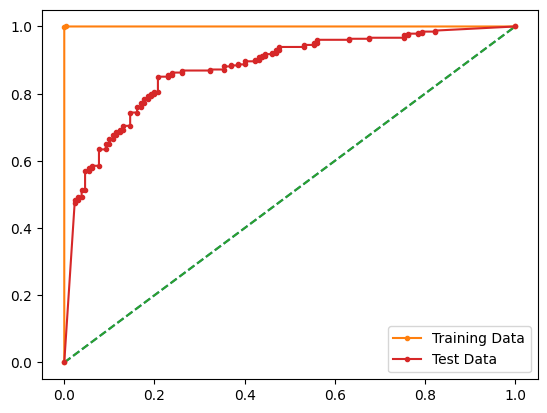

In [338]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [339]:
KNN_model = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
KNN_model.fit(X_train, y_train)
y_train_predict = KNN_model.predict(X_test)
print("Accuracy Score for K=3 is ", KNN_model.score(X_test, y_test))

KNN_model = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
KNN_model.fit(X_train, y_train)
y_train_predict = KNN_model.predict(X_test)
print("Accuracy Score for K=5 is ", KNN_model.score(X_test, y_test))

KNN_model = KNeighborsClassifier(n_neighbors= 7 , weights = 'distance' )
KNN_model.fit(X_train, y_train)
y_train_predict = KNN_model.predict(X_test)
print("Accuracy Score for K=7 is ", KNN_model.score(X_test, y_test))

KNN_model = KNeighborsClassifier(n_neighbors= 9 , weights = 'distance' )
KNN_model.fit(X_train, y_train)
y_train_predict = KNN_model.predict(X_test)
print("Accuracy Score for K=9 is ", KNN_model.score(X_test, y_test))

Accuracy Score for K=3 is  0.8056768558951966
Accuracy Score for K=5 is  0.8209606986899564
Accuracy Score for K=7 is  0.8275109170305677
Accuracy Score for K=9 is  0.8275109170305677


In [340]:
KNN_model = KNeighborsClassifier(n_neighbors= 3 , metric = 'euclidean' )
KNN_model.fit(X_train, y_train)
y_test_predict = KNN_model.predict(X_test)
print("Accuracy Score for K=3 is ", KNN_model.score(X_test, y_test))

KNN_model = KNeighborsClassifier(n_neighbors= 5 , metric = 'euclidean' )
KNN_model.fit(X_train, y_train)
y_test_predict = KNN_model.predict(X_test)
print("Accuracy Score for K=5 is ", KNN_model.score(X_test, y_test))

KNN_model = KNeighborsClassifier(n_neighbors= 7 , metric = 'euclidean' )
KNN_model.fit(X_train, y_train)
y_test_predict = KNN_model.predict(X_test)
print("Accuracy Score for K=7 is ", KNN_model.score(X_test, y_test))

KNN_model = KNeighborsClassifier(n_neighbors= 9 , metric = 'euclidean' )
KNN_model.fit(X_train, y_train)
y_test_predict = KNN_model.predict(X_test)
print("Accuracy Score for K=9 is ", KNN_model.score(X_test, y_test))

Accuracy Score for K=3 is  0.8100436681222707
Accuracy Score for K=5 is  0.8231441048034934
Accuracy Score for K=7 is  0.8318777292576419
Accuracy Score for K=9 is  0.8296943231441049


Building Naive Bayes model

In [341]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [342]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [343]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print("Accuracy of train data set : \n",model_score)
print("Confusion matrix for train data set: \n", metrics.confusion_matrix(y_train, y_train_predict))
print("Evaluation metrics for train set:\n",metrics.classification_report(y_train, y_train_predict))

Accuracy of train data set : 
 0.8331771321462043
Confusion matrix for train data set: 
 [[240  92]
 [ 86 649]]
Evaluation metrics for train set:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [344]:
y_test.value_counts()

1    328
0    130
Name: vote, dtype: int64

In [345]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print("Accuracy of test data set : \n",model_score)
print("Confusion matrix for test data set: \n",metrics.confusion_matrix(y_test, y_test_predict))
print("Evaluation metrics for test set:\n",metrics.classification_report(y_test, y_test_predict))

Accuracy of test data set : 
 0.8253275109170306
Confusion matrix for test data set: 
 [[ 94  36]
 [ 44 284]]
Evaluation metrics for test set:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



In [346]:
pred_prob_train = NB_model.predict_proba(X_train)
pred_prob_test = NB_model.predict_proba(X_test)

AUC for the Training Data: 0.886
AUC for the Test Data: 0.885


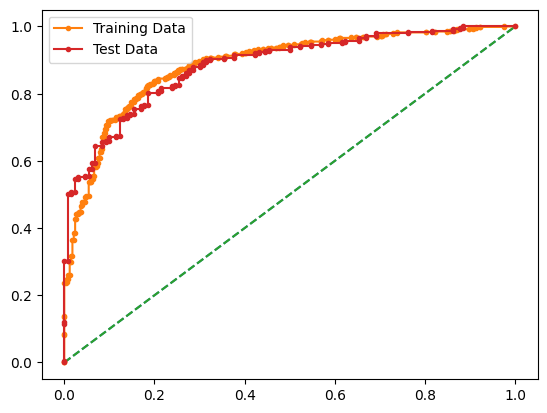

In [347]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Bagging

In [348]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [349]:
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.9990627928772259
[[331   1]
 [  0 735]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [350]:
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.7991266375545851
[[ 84  46]
 [ 46 282]]
              precision    recall  f1-score   support

           0       0.65      0.65      0.65       130
           1       0.86      0.86      0.86       328

    accuracy                           0.80       458
   macro avg       0.75      0.75      0.75       458
weighted avg       0.80      0.80      0.80       458



In [351]:
pred_prob_train = Bagging_model.predict_proba(X_train)
pred_prob_test = Bagging_model.predict_proba(X_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.878


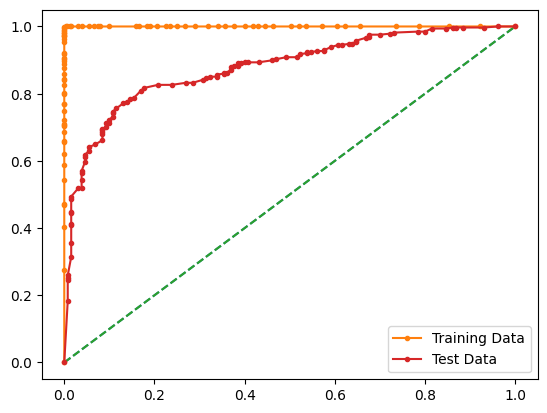

In [352]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Ada Boosting

In [353]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [354]:
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8472352389878163
[[238  94]
 [ 69 666]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.74       332
           1       0.88      0.91      0.89       735

    accuracy                           0.85      1067
   macro avg       0.83      0.81      0.82      1067
weighted avg       0.84      0.85      0.85      1067



In [355]:
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8187772925764192
[[ 90  40]
 [ 43 285]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.68       130
           1       0.88      0.87      0.87       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



In [356]:
pred_prob_train = ADB_model.predict_proba(X_train)
pred_prob_test = ADB_model.predict_proba(X_test)

AUC for the Training Data: 0.913
AUC for the Test Data: 0.879


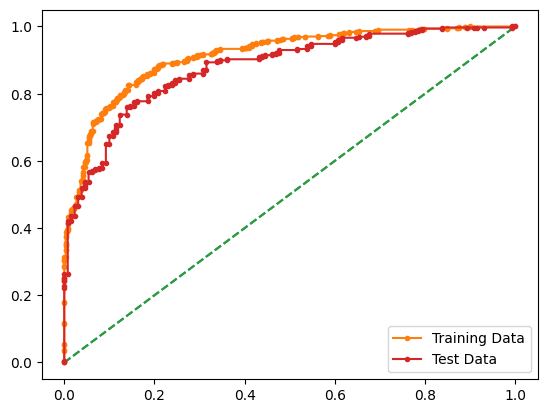

In [357]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Gradient Boosting

In [358]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [359]:
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8734770384254921
[[250  82]
 [ 53 682]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       332
           1       0.89      0.93      0.91       735

    accuracy                           0.87      1067
   macro avg       0.86      0.84      0.85      1067
weighted avg       0.87      0.87      0.87      1067



In [360]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8362445414847162
[[ 97  33]
 [ 42 286]]
              precision    recall  f1-score   support

           0       0.70      0.75      0.72       130
           1       0.90      0.87      0.88       328

    accuracy                           0.84       458
   macro avg       0.80      0.81      0.80       458
weighted avg       0.84      0.84      0.84       458



In [361]:
pred_prob_train = gbcl.predict_proba(X_train)
pred_prob_test = gbcl.predict_proba(X_test)

AUC for the Training Data: 0.936
AUC for the Test Data: 0.906


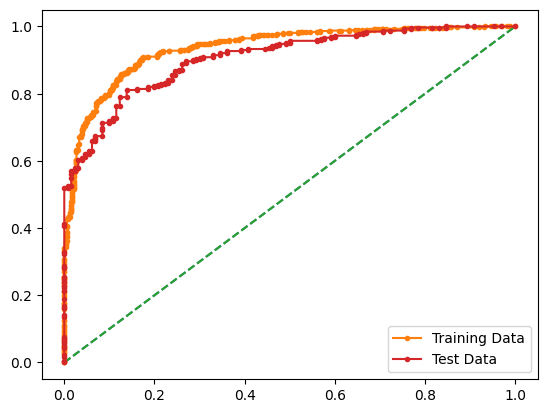

In [362]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Modelling after Min-Max scaling

Accuracy for KNN for train and test data is 99 and 80%. After using distance or euclidean based modelling KNN got the accuracy as 83 for both train and data when k=7 or 9.

Accuracy for Naive-Bayes for train and test data is 83 and 83%.

Accuracy for Bagging for train and test data is 99 and 80%.

Accuracy score for Ada Boosting for train and test data are 85 and 82%.

Accuracy score for Gradient Boosting for train and test data are 89 and 83%.

From all the models Accuracy we see that the accuracy for Gradient boosting is high as 89 and 83%.

Best performing models are : Gradient Boosting, Ada Boosting and Naive Bayes.
Worst performing models are : KNN and Bagging.

# **Building Decision tree model without Min- Max Scaling**

In [363]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [364]:
dfd = df.drop('Unnamed: 0',axis=1)
dfd

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [365]:
dfd["vote"] =dfd["vote"].astype('category')
dfd["gender"] =dfd["gender"].astype('category')

In [366]:
dfd["vote"] =dfd["vote"].cat.codes
dfd["gender"] =dfd["gender"].cat.codes

In [367]:
dfd.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


Split data

In [368]:
X = dfd.drop('vote',axis = 1)
y = dfd.pop('vote')

In [369]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

KNN modelling

In [370]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [371]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print("KNN model without any scaling")
print("Accuracy score for train data:\n",model_score)
print("Confusion matrix for train data:\n",metrics.confusion_matrix(y_train, y_train_predict))
print("Classification report for train data:\n",metrics.classification_report(y_train, y_train_predict))

KNN model without any scaling
Accuracy score for train data:
 0.9990627928772259
Confusion matrix for train data:
 [[332   0]
 [  1 734]]
Classification report for train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      1.00      1.00       735

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



In [372]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print("KNN model without any scaling")
print("Accuracy score for test data:\n",model_score)
print("Confusion matrix for test data:\n",metrics.confusion_matrix(y_test, y_test_predict))
print("Classification report for test data:\n",metrics.classification_report(y_test, y_test_predict))

KNN model without any scaling
Accuracy score for test data:
 0.7663755458515283
Confusion matrix for test data:
 [[ 77  53]
 [ 54 274]]
Classification report for test data:
               precision    recall  f1-score   support

           0       0.59      0.59      0.59       130
           1       0.84      0.84      0.84       328

    accuracy                           0.77       458
   macro avg       0.71      0.71      0.71       458
weighted avg       0.77      0.77      0.77       458



Naive-Bayes

In [373]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [374]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print("Naive-Bayes - Train data")
print("Accuracy of train data set : \n",model_score)
print("Confusion matrix for train data set: \n", metrics.confusion_matrix(y_train, y_train_predict))
print("Evaluation metrics for train set:\n",metrics.classification_report(y_train, y_train_predict))

Naive-Bayes - Train data
Accuracy of train data set : 
 0.8331771321462043
Confusion matrix for train data set: 
 [[240  92]
 [ 86 649]]
Evaluation metrics for train set:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73       332
           1       0.88      0.88      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.80      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [375]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print("Naive-Bayes - test data")
print("Accuracy of test data set : \n",model_score)
print("Confusion matrix for test data set: \n",metrics.confusion_matrix(y_test, y_test_predict))
print("Evaluation metrics for test set:\n",metrics.classification_report(y_test, y_test_predict))

Naive-Bayes - test data
Accuracy of test data set : 
 0.8253275109170306
Confusion matrix for test data set: 
 [[ 94  36]
 [ 44 284]]
Evaluation metrics for test set:
               precision    recall  f1-score   support

           0       0.68      0.72      0.70       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.78      0.79      0.79       458
weighted avg       0.83      0.83      0.83       458



In [376]:
pred_prob_train = NB_model.predict_proba(X_train)
pred_prob_test = NB_model.predict_proba(X_test)

AUC for the Training Data: 0.886
AUC for the Test Data: 0.885


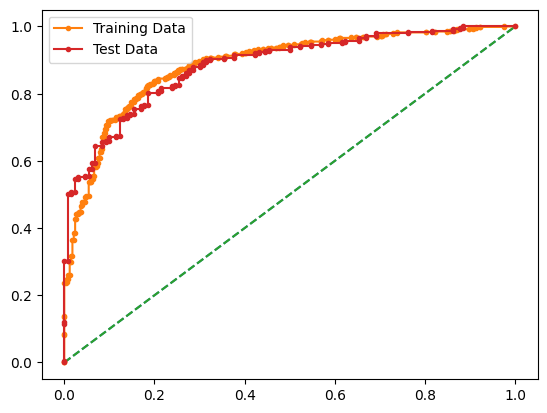

In [377]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Decision Tree model building

In [378]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [379]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9990627928772259
0.7510917030567685


In [380]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [381]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

Output hidden; open in https://colab.research.google.com to view.

Regularize the overfitting

In [382]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.8256794751640113
0.8056768558951966


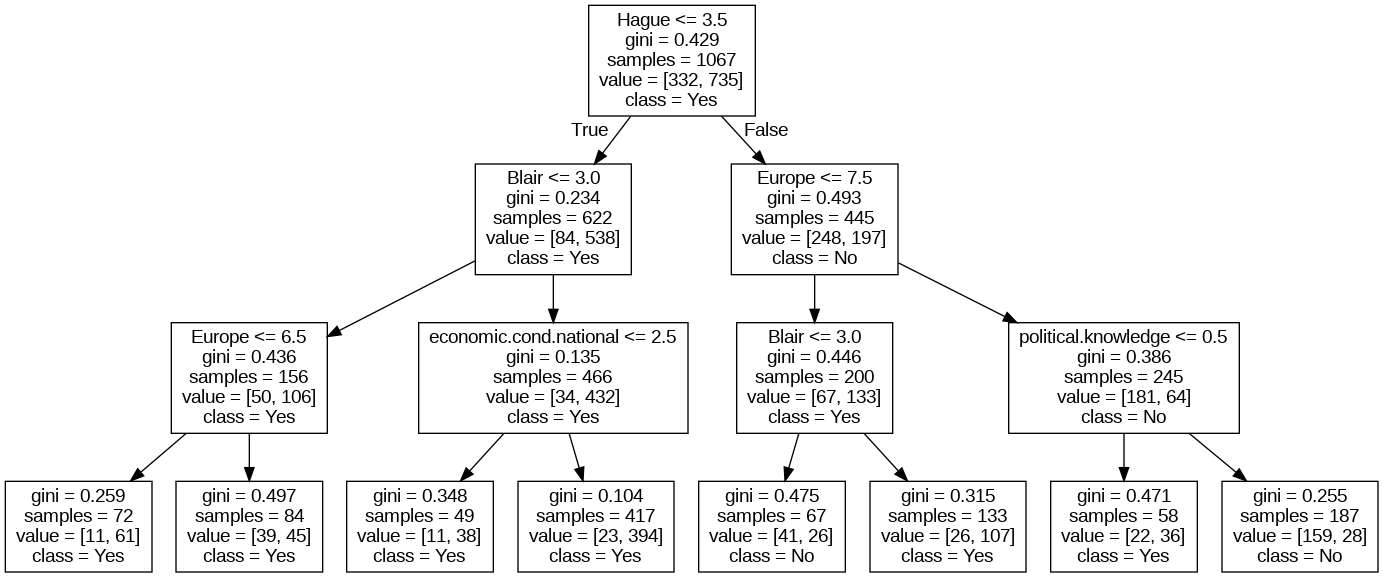

In [383]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_treeR.dot -o credit_treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_treeR.png"))

In [384]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

                              Imp
age                      0.000000
economic.cond.national   0.013385
economic.cond.household  0.000000
Blair                    0.158513
Hague                    0.492402
Europe                   0.231168
political.knowledge      0.104532
gender                   0.000000


0.8256794751640113
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       332
           1       0.84      0.93      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.76      0.78      1067
weighted avg       0.82      0.83      0.82      1067



<Axes: >

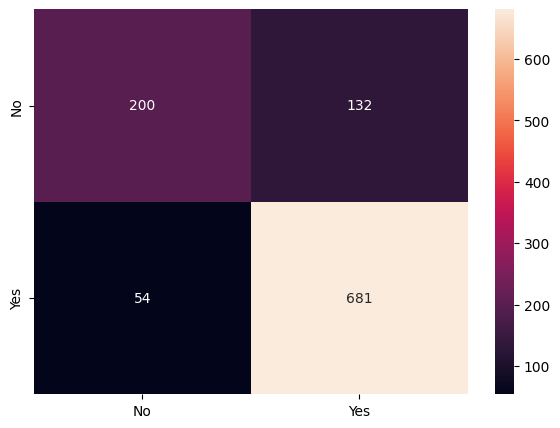

In [385]:
print(dTreeR.score(X_train , y_train))
y_predict = dTreeR.predict(X_train)
print(classification_report(y_train, y_predict))
cm=metrics.confusion_matrix(y_train, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

0.8056768558951966
              precision    recall  f1-score   support

           0       0.70      0.55      0.62       130
           1       0.84      0.91      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.73      0.74       458
weighted avg       0.80      0.81      0.80       458



<Axes: >

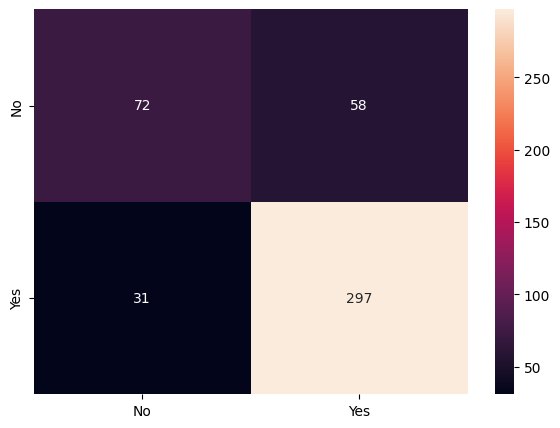

In [386]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)
print(classification_report(y_test, y_predict))
cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Ensemble - Bagging

In [387]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bgcl = BaggingClassifier(random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

Bagging Model - Train data
Accuracy for train data set: 
 0.9812558575445174
Confusion matrix for train data set: 
 [[326   6]
 [ 14 721]]
Classification report for train data set: 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       332
           1       0.99      0.98      0.99       735

    accuracy                           0.98      1067
   macro avg       0.98      0.98      0.98      1067
weighted avg       0.98      0.98      0.98      1067



<Axes: >

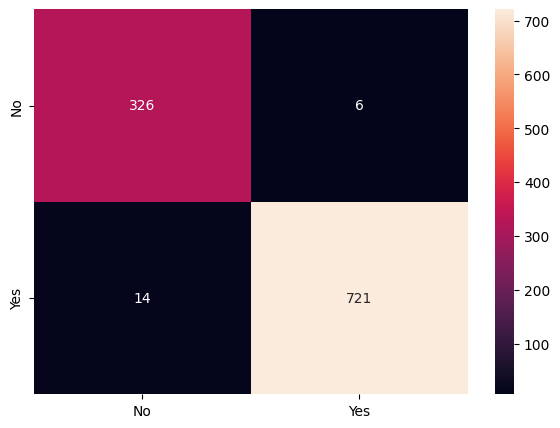

In [388]:
y_train_predict = bgcl.predict(X_train)
print("Bagging Model - Train data")
print("Accuracy for train data set: \n",bgcl.score(X_train , y_train))
print("Confusion matrix for train data set: \n",metrics.confusion_matrix(y_train, y_train_predict))
print("Classification report for train data set: \n",classification_report(y_train, y_train_predict))
cm=metrics.confusion_matrix(y_train, y_train_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Bagging Model - Test data
Accuracy for Test data set: 
 0.8144104803493449
Confusion matrix for Test data set: 
 [[ 91  39]
 [ 46 282]]
Classification report for Test data set: 
               precision    recall  f1-score   support

           0       0.66      0.70      0.68       130
           1       0.88      0.86      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.78      0.78       458
weighted avg       0.82      0.81      0.82       458



<Axes: >

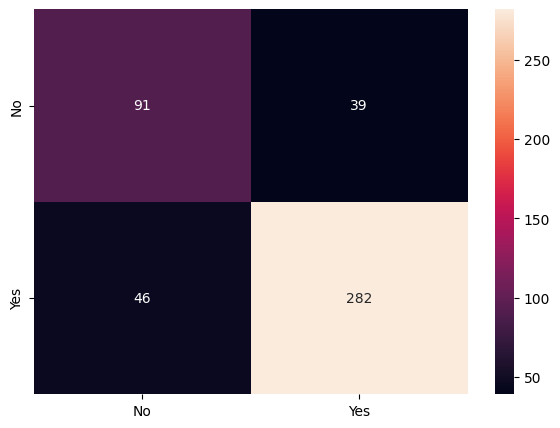

In [389]:
y_test_predict = bgcl.predict(X_test)
print("Bagging Model - Test data")
print("Accuracy for Test data set: \n",bgcl.score(X_test , y_test))
print("Confusion matrix for Test data set: \n",metrics.confusion_matrix(y_test, y_test_predict))
print("Classification report for Test data set: \n",classification_report(y_test, y_test_predict))
cm=metrics.confusion_matrix(y_test, y_test_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [390]:
pred_prob_train = bgcl.predict_proba(X_train)
pred_prob_test = bgcl.predict_proba(X_test)

AUC for the Training Data: 0.998
AUC for the Test Data: 0.863


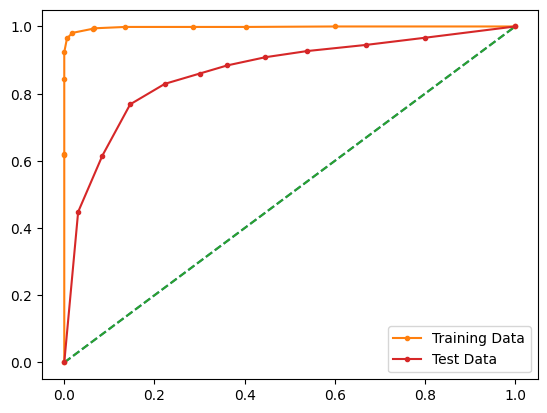

In [391]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Ensemble - AdaBoosting

In [392]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier( random_state=1)

abcl = abcl.fit(X_train, y_train)

Ada Boosting Model - Train data
Accuracy for Train data set: 
 0.8425492033739457
Confusion matrix for Train data set: 
 [[236  96]
 [ 72 663]]
Classification report for Train data set: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74       332
           1       0.87      0.90      0.89       735

    accuracy                           0.84      1067
   macro avg       0.82      0.81      0.81      1067
weighted avg       0.84      0.84      0.84      1067



<Axes: >

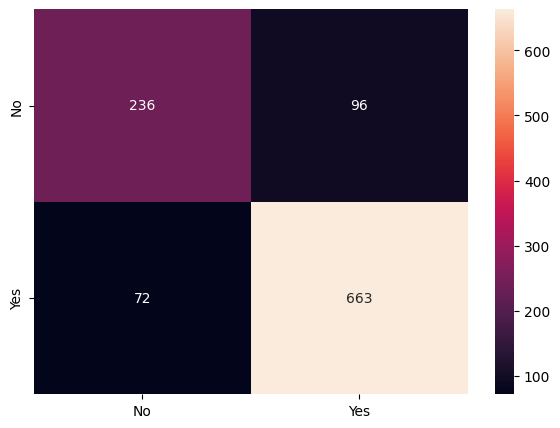

In [393]:
y_train_predict = abcl.predict(X_train)
print("Ada Boosting Model - Train data")
print("Accuracy for Train data set: \n",abcl.score(X_train, y_train))
print("Confusion matrix for Train data set: \n",metrics.confusion_matrix(y_train, y_train_predict))
print("Classification report for Train data set: \n",classification_report(y_train, y_train_predict))
cm=metrics.confusion_matrix(y_train, y_train_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Ada Boosting Model - Test data
Accuracy for Test data set: 
 0.8231441048034934
Confusion matrix for Test data set: 
 [[ 90  40]
 [ 41 287]]
Classification report for Test data set: 
               precision    recall  f1-score   support

           0       0.69      0.69      0.69       130
           1       0.88      0.88      0.88       328

    accuracy                           0.82       458
   macro avg       0.78      0.78      0.78       458
weighted avg       0.82      0.82      0.82       458



<Axes: >

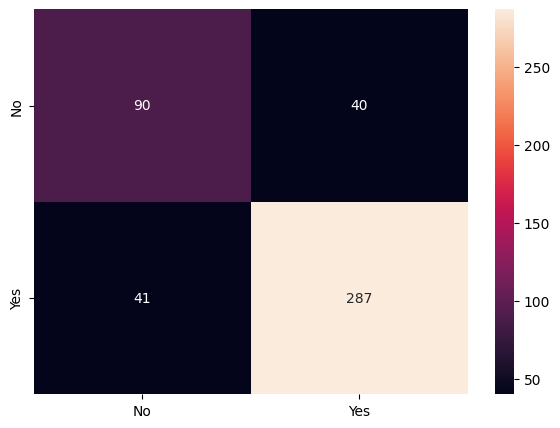

In [394]:
y_test_predict = abcl.predict(X_test)
print("Ada Boosting Model - Test data")
print("Accuracy for Test data set: \n",abcl.score(X_test , y_test))
print("Confusion matrix for Test data set: \n",metrics.confusion_matrix(y_test, y_test_predict))
print("Classification report for Test data set: \n",classification_report(y_test, y_test_predict))
cm=metrics.confusion_matrix(y_test, y_test_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [395]:
pred_prob_train = abcl.predict_proba(X_train)
pred_prob_test = abcl.predict_proba(X_test)

AUC for the Training Data: 0.910
AUC for the Test Data: 0.880


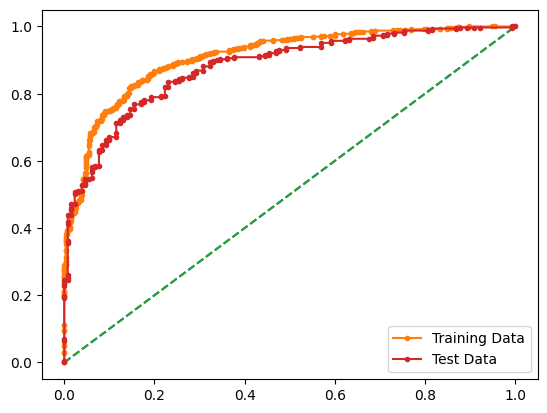

In [396]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Ensemble - GradientBoost

In [397]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

Gradient Boosting Model - Train data
Accuracy for Train data set: 
 0.8734770384254921
Confusion matrix for Train data set: 
 [[250  82]
 [ 53 682]]
Classification report for Train data set: 
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       332
           1       0.89      0.93      0.91       735

    accuracy                           0.87      1067
   macro avg       0.86      0.84      0.85      1067
weighted avg       0.87      0.87      0.87      1067



<Axes: >

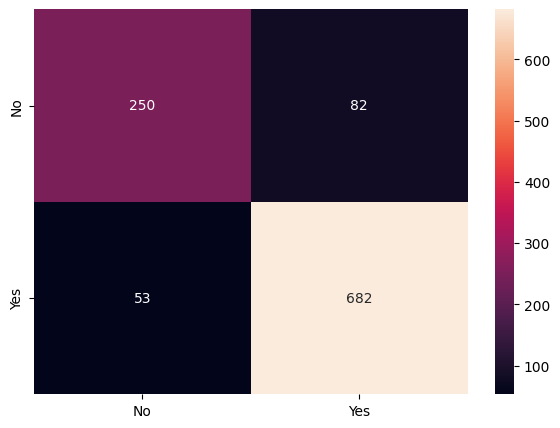

In [398]:
y_train_predict = gbcl.predict(X_train)
print("Gradient Boosting Model - Train data")
print("Accuracy for Train data set: \n",gbcl.score(X_train, y_train))
print("Confusion matrix for Train data set: \n",metrics.confusion_matrix(y_train, y_train_predict))
print("Classification report for Train data set: \n",classification_report(y_train, y_train_predict))
cm=metrics.confusion_matrix(y_train, y_train_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Gradient Boosting Model - Test data
Accuracy for Test data set: 
 0.8362445414847162
Confusion matrix for Test data set: 
 [[ 97  33]
 [ 42 286]]
Classification report for Test data set: 
               precision    recall  f1-score   support

           0       0.70      0.75      0.72       130
           1       0.90      0.87      0.88       328

    accuracy                           0.84       458
   macro avg       0.80      0.81      0.80       458
weighted avg       0.84      0.84      0.84       458



<Axes: >

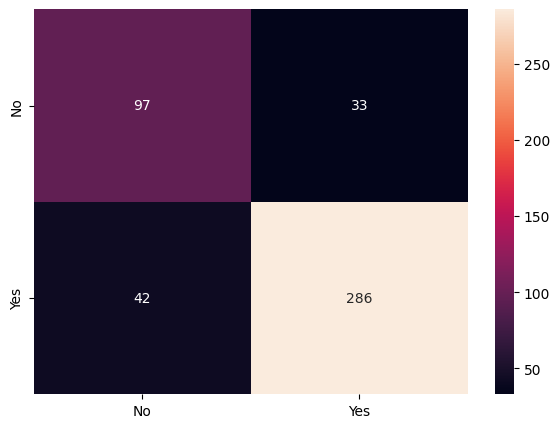

In [399]:
y_test_predict = gbcl.predict(X_test)
print("Gradient Boosting Model - Test data")
print("Accuracy for Test data set: \n",gbcl.score(X_test, y_test))
print("Confusion matrix for Test data set: \n",metrics.confusion_matrix(y_test, y_test_predict))
print("Classification report for Test data set: \n",classification_report(y_test, y_test_predict))
cm=metrics.confusion_matrix(y_test, y_test_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [400]:
pred_prob_train = gbcl.predict_proba(X_train)
pred_prob_test = gbcl.predict_proba(X_test)

AUC for the Training Data: 0.936
AUC for the Test Data: 0.907


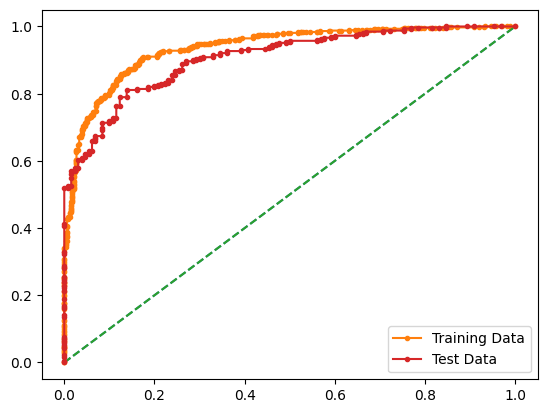

In [401]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Modelling without Min-Max scaling

Accuracy for Bagging for train and test data is 99 and 80%.

Accuracy score for Ada Boosting for train and test data are 84 and 82%.

Accuracy score for Gradient Boosting for train and test data are 87 and 84%.


Model Performance improvement
- Improve the model performance of bagging and boosting models by tuning the model
- Comment on the model performance improvement on training and test data

Bagging

In [402]:
bgcl = BaggingClassifier( base_estimator=dTreeR, n_estimators = 10, random_state=1)
bgcl

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                        random_state=1),
                  random_state=1)

In [403]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bgcl = BaggingClassifier( base_estimator=dTreeR, n_estimators = 10, random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [404]:
y_train_predict = bgcl.predict(X_train)
print("Bagging Model - Train data")
print("Accuracy for train data set: \n",bgcl.score(X_train , y_train))
print("Confusion matrix for train data set: \n",metrics.confusion_matrix(y_train, y_train_predict))
print("Classification report for train data set: \n",classification_report(y_train, y_train_predict))

Bagging Model - Train data
Accuracy for train data set: 
 0.831302717900656
Confusion matrix for train data set: 
 [[221 111]
 [ 69 666]]
Classification report for train data set: 
               precision    recall  f1-score   support

           0       0.76      0.67      0.71       332
           1       0.86      0.91      0.88       735

    accuracy                           0.83      1067
   macro avg       0.81      0.79      0.80      1067
weighted avg       0.83      0.83      0.83      1067



In [405]:
y_test_predict = bgcl.predict(X_test)
print("Bagging Model - Test data")
print("Accuracy for Test data set: \n",bgcl.score(X_test , y_test))
print("Confusion matrix for Test data set: \n",metrics.confusion_matrix(y_test, y_test_predict))
print("Classification report for Test data set: \n",classification_report(y_test, y_test_predict))

Bagging Model - Test data
Accuracy for Test data set: 
 0.8056768558951966
Confusion matrix for Test data set: 
 [[ 81  49]
 [ 40 288]]
Classification report for Test data set: 
               precision    recall  f1-score   support

           0       0.67      0.62      0.65       130
           1       0.85      0.88      0.87       328

    accuracy                           0.81       458
   macro avg       0.76      0.75      0.76       458
weighted avg       0.80      0.81      0.80       458



Boosting

Ada Boosting

In [406]:
abcl = AdaBoostClassifier( base_estimator=dTreeR, n_estimators=10, random_state=1)

abcl = abcl.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [407]:
abcl

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   n_estimators=10, random_state=1)

In [408]:
y_train_predict = abcl.predict(X_train)
print("Ada Boosting Model - Train data")
print("Accuracy for Train data set: \n",abcl.score(X_train, y_train))
print("Confusion matrix for Train data set: \n",metrics.confusion_matrix(y_train, y_train_predict))
print("Classification report for Train data set: \n",classification_report(y_train, y_train_predict))

Ada Boosting Model - Train data
Accuracy for Train data set: 
 0.8706654170571696
Confusion matrix for Train data set: 
 [[259  73]
 [ 65 670]]
Classification report for Train data set: 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       332
           1       0.90      0.91      0.91       735

    accuracy                           0.87      1067
   macro avg       0.85      0.85      0.85      1067
weighted avg       0.87      0.87      0.87      1067



In [409]:
y_test_predict = abcl.predict(X_test)
print("Ada Boosting Model - Test data")
print("Accuracy for Test data set: \n",abcl.score(X_test , y_test))
print("Confusion matrix for Test data set: \n",metrics.confusion_matrix(y_test, y_test_predict))
print("Classification report for Test data set: \n",classification_report(y_test, y_test_predict))

Ada Boosting Model - Test data
Accuracy for Test data set: 
 0.8122270742358079
Confusion matrix for Test data set: 
 [[ 93  37]
 [ 49 279]]
Classification report for Test data set: 
               precision    recall  f1-score   support

           0       0.65      0.72      0.68       130
           1       0.88      0.85      0.87       328

    accuracy                           0.81       458
   macro avg       0.77      0.78      0.78       458
weighted avg       0.82      0.81      0.81       458



In [410]:
pred_prob_train = abcl.predict_proba(X_train)
pred_prob_test = abcl.predict_proba(X_test)

AUC for the Training Data: 0.946
AUC for the Test Data: 0.839


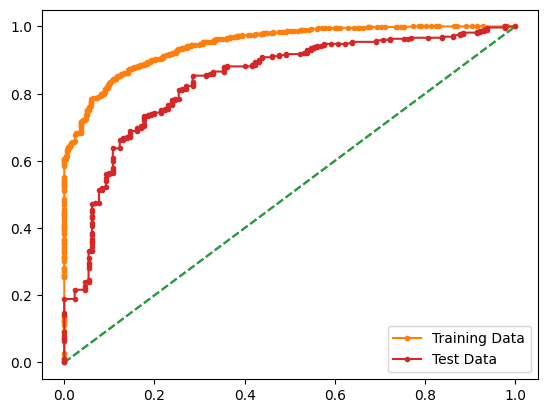

In [411]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

Gradient boosting

In [413]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [414]:
y_train_predict = gbcl.predict(X_train)
print("Gradient Boosting Model - Train data")
print("Accuracy for Train data set: \n",gbcl.score(X_train, y_train))
print("Confusion matrix for Train data set: \n",metrics.confusion_matrix(y_train, y_train_predict))
print("Classification report for Train data set: \n",classification_report(y_train, y_train_predict))

Gradient Boosting Model - Train data
Accuracy for Train data set: 
 0.8865979381443299
Confusion matrix for Train data set: 
 [[262  70]
 [ 51 684]]
Classification report for Train data set: 
               precision    recall  f1-score   support

           0       0.84      0.79      0.81       332
           1       0.91      0.93      0.92       735

    accuracy                           0.89      1067
   macro avg       0.87      0.86      0.87      1067
weighted avg       0.89      0.89      0.89      1067



In [415]:
y_test_predict = gbcl.predict(X_test)
print("Gradient Boosting Model - Test data")
print("Accuracy for Test data set: \n",gbcl.score(X_test, y_test))
print("Confusion matrix for Test data set: \n",metrics.confusion_matrix(y_test, y_test_predict))
print("Classification report for Test data set: \n",classification_report(y_test, y_test_predict))

Gradient Boosting Model - Test data
Accuracy for Test data set: 
 0.8318777292576419
Confusion matrix for Test data set: 
 [[ 96  34]
 [ 43 285]]
Classification report for Test data set: 
               precision    recall  f1-score   support

           0       0.69      0.74      0.71       130
           1       0.89      0.87      0.88       328

    accuracy                           0.83       458
   macro avg       0.79      0.80      0.80       458
weighted avg       0.84      0.83      0.83       458



In [416]:
pred_prob_train = gbcl.predict_proba(X_train)
pred_prob_test = gbcl.predict_proba(X_test)

AUC for the Training Data: 0.950
AUC for the Test Data: 0.904


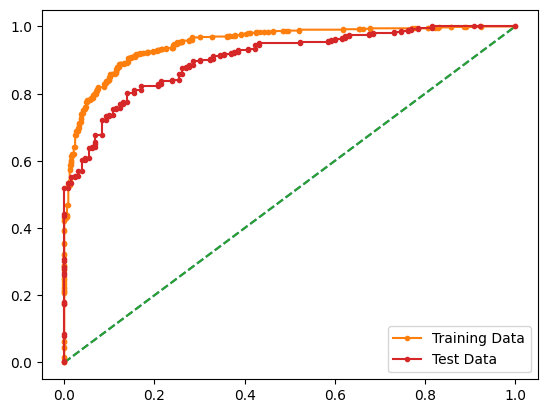

In [417]:
# AUC and ROC for the training data
# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

# AUC and ROC for the test data
# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [128]:
pip install imbalanced-learn

In [260]:
from numpy import where
from imblearn.over_sampling import SMOTE

from collections import Counter
from sklearn.datasets import make_classification

In [261]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [262]:
X_train_res.shape

(1470, 8)

Bagging SMOTE

In [131]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [266]:
cart = DecisionTreeClassifier()
Bagging_model_SM=BaggingClassifier(random_state=1)
Bagging_model_SM.fit(X_train_res, y_train_res)

BaggingClassifier(random_state=1)

In [267]:
y_train_predict = Bagging_model_SM.predict(X_train_res)
model_score = Bagging_model_SM.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, y_train_predict))
print(metrics.classification_report(y_train_res ,y_train_predict))

0.9829931972789115
[[731   4]
 [ 21 714]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       735
           1       0.99      0.97      0.98       735

    accuracy                           0.98      1470
   macro avg       0.98      0.98      0.98      1470
weighted avg       0.98      0.98      0.98      1470



In [268]:
y_test_predict = Bagging_model_SM.predict(X_test)
model_score = Bagging_model_SM.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8100436681222707
[[ 97  33]
 [ 54 274]]
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       130
           1       0.89      0.84      0.86       328

    accuracy                           0.81       458
   macro avg       0.77      0.79      0.78       458
weighted avg       0.82      0.81      0.81       458



Boosting with SMOTE

In [270]:
abcl = AdaBoostClassifier(  random_state=1)

abcl = abcl.fit(X_train_res, y_train_res)

In [271]:
y_train_predict = abcl.predict(X_train_res)
print("Ada Boosting Model - Train data")
print("Accuracy for Train data set: \n",abcl.score(X_train_res, y_train_res))
print("Confusion matrix for Train data set: \n",metrics.confusion_matrix(y_train_res, y_train_predict))
print("Classification report for Train data set: \n",classification_report(y_train_res, y_train_predict))

Ada Boosting Model - Train data
Accuracy for Train data set: 
 0.8523809523809524
Confusion matrix for Train data set: 
 [[627 108]
 [109 626]]
Classification report for Train data set: 
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       735
           1       0.85      0.85      0.85       735

    accuracy                           0.85      1470
   macro avg       0.85      0.85      0.85      1470
weighted avg       0.85      0.85      0.85      1470



In [272]:
y_test_predict = abcl.predict(X_test)
print("Ada Boosting Model - Test data")
print("Accuracy for Test data set: \n",abcl.score(X_test , y_test))
print("Confusion matrix for Test data set: \n",metrics.confusion_matrix(y_test, y_test_predict))
print("Classification report for Test data set: \n",classification_report(y_test, y_test_predict))

Ada Boosting Model - Test data
Accuracy for Test data set: 
 0.8034934497816594
Confusion matrix for Test data set: 
 [[100  30]
 [ 60 268]]
Classification report for Test data set: 
               precision    recall  f1-score   support

           0       0.62      0.77      0.69       130
           1       0.90      0.82      0.86       328

    accuracy                           0.80       458
   macro avg       0.76      0.79      0.77       458
weighted avg       0.82      0.80      0.81       458



Gradient Boosting

In [274]:
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train_res, y_train_res)

In [275]:
y_train_predict = gbcl.predict(X_train_res)
print("Gradient Boosting Model - Train data")
print("Accuracy for Train data set: \n",gbcl.score(X_train_res, y_train_res))
print("Confusion matrix for Train data set: \n",metrics.confusion_matrix(y_train_res, y_train_predict))
print("Classification report for Train data set: \n",classification_report(y_train_res, y_train_predict))

Gradient Boosting Model - Train data
Accuracy for Train data set: 
 0.8952380952380953
Confusion matrix for Train data set: 
 [[668  67]
 [ 87 648]]
Classification report for Train data set: 
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       735
           1       0.91      0.88      0.89       735

    accuracy                           0.90      1470
   macro avg       0.90      0.90      0.90      1470
weighted avg       0.90      0.90      0.90      1470



# **Problem 2 - Define the problem and Perform Exploratory Data Analysis**

-Problem Definition - Find the number of Character, words & sentences in all three speeches

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973

In [135]:
import nltk

In [136]:
path_excel = "/content/drive/My Drive/Module_6_Machine_Learning_2_Week_4_Project/Project_Speech.xlsx"
df = pd.read_excel(path_excel)
df

,Name,Speech
0,Roosevelt,On each national day of inauguration since 178...
1,Kennedy,"Vice President Johnson, Mr. Speaker, Mr. Chief..."
2,Nixon,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


In [137]:
len(df)

3

In [138]:
df['char_count'] = df['Speech'].str.len()
df[['Speech','char_count']].head()

,Speech,char_count
0,On each national day of inauguration since 178...,7651
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7673
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10106


In [139]:
len(df['Speech'][0])

7651

In [140]:
len(df['Speech'][1])

7673

In [141]:
len(df['Speech'][2])

10106

In [142]:
df['Totalwords'] = [len(x.split()) for x in df['Speech'].tolist()]
df[['Speech','Totalwords']].head()

,Speech,Totalwords
0,On each national day of inauguration since 178...,1323
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


In [143]:
df['word_count'] = df['Speech'].apply(lambda x: len(str(x).split(" ")))
df[['Speech','word_count']].head()

,Speech,word_count
0,On each national day of inauguration since 178...,1323
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",1364
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",1769


In [144]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [145]:
from nltk.tokenize import sent_tokenize

def count_sentences(text):
    sentences = sent_tokenize(text)
    return len(sentences)

# Example text
text = df['Speech'][0]

# Count the number of sentences
num_sentences = count_sentences(text)
print("Number of sentences in Roosevolt Speech :", num_sentences)

Number of sentences in Roosevolt Speech : 32


In [146]:
def count_sentences(text):
    sentences = sent_tokenize(text)
    return len(sentences)

# Example text
text = df['Speech'][1]

# Count the number of sentences
num_sentences = count_sentences(text)
print("Number of sentences in Kennedy Speech:", num_sentences)

Number of sentences in Kennedy Speech: 27


In [147]:
def count_sentences(text):
    sentences = sent_tokenize(text)
    return len(sentences)

# Example text
text = df['Speech'][2]

# Count the number of sentences
num_sentences = count_sentences(text)
print("Number of sentences in Nixon Speech:", num_sentences)

Number of sentences in Nixon Speech: 20


# **Problem 2 - Text cleaning**
- Stopword removal - Stemming - find the 3 most common words used in all three speeches

In [148]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [149]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Speech', 'stopwords']].head()

,Speech,stopwords
0,On each national day of inauguration since 178...,632
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",618
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",899


In [150]:
df['hastags'] = df['Speech'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['Speech','hastags']].head()

,Speech,hastags
0,On each national day of inauguration since 178...,0
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",0
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",0


In [151]:
df['at'] = df['Speech'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
df[['Speech','at']].head()

,Speech,at
0,On each national day of inauguration since 178...,0
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",0
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",0


In [152]:
import re
import string

In [153]:
df['numerics'] = df['Speech'].apply(lambda x: len(re.findall(r'[0-9]',x)))
df[['Speech','numerics']].head()

,Speech,numerics
0,On each national day of inauguration since 178...,14
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",7
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",10


In [154]:
df['UpperCase'] = df['Speech'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['Speech','UpperCase']].head()

,Speech,UpperCase
0,On each national day of inauguration since 178...,1
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",5
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",13


In [155]:
df['upper_letter'] = df['Speech'].apply(lambda x: len(re.findall(r'[A-Z]',x)))
df[['Speech','upper_letter']].head()

,Speech,upper_letter
0,On each national day of inauguration since 178...,119
1,"Vice President Johnson, Mr. Speaker, Mr. Chief...",94
2,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",132


In [156]:
df['Speech'] = df['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Speech'].head()

0    on each national day of inauguration since 178...
1    vice president johnson, mr. speaker, mr. chief...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

In [157]:
df['Speech'] = df['Speech'].str.replace('[^\w\s]','')
df['Speech']

<ipython-input-157-b698e690ec49>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Speech'] = df['Speech'].str.replace('[^\w\s]','')


0    on each national day of inauguration since 178...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

Stopwords removal

In [158]:
df['Speech'] = df['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Speech'].head()

0    national day inauguration since 1789 people re...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [159]:
df['stopwords'] = df['Speech'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Speech', 'stopwords']].head()

,Speech,stopwords
0,national day inauguration since 1789 people re...,0
1,vice president johnson mr speaker mr chief jus...,0
2,mr vice president mr speaker mr chief justice ...,0


Common words

In [160]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [161]:
df = pd.DataFrame(df['Speech'])

# Concatenate all speech data into a single string
all_speech = ' '.join(df['Speech'])

# Tokenize the concatenated string into words
words = word_tokenize(all_speech)

In [162]:
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.lower() not in stop_words]

# Count the frequency of each word
word_freq = Counter(filtered_words)

# Get the most common words
common_words = word_freq.most_common(10)  # Change 10 to the number of common words you want to extract

print("Most common words:")
for word, freq in common_words:
    print(word, ":", freq)

Most common words:
us : 45
new : 26
let : 25
america : 20
nation : 19
peace : 19
world : 18
nations : 14
people : 13
government : 13


In [163]:
all_words=[i for i in ' '.join(df['Speech']).split()]

In [164]:
words=pd.DataFrame(data=all_words, columns=['words'])

In [165]:
words.value_counts().head(10)

words     
us            45
new           26
let           25
america       20
peace         19
nation        19
world         18
nations       14
government    13
know          13
dtype: int64

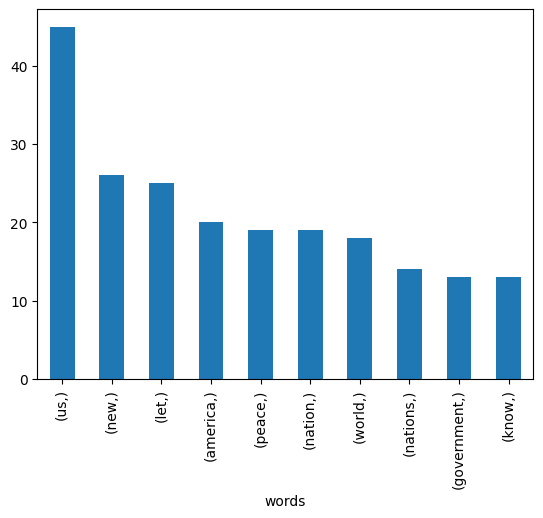

In [166]:
words.value_counts().head(10).plot.bar()
plt.show()

Let us remove some common words that are not matching with the speeches given by leaders. those are us,let,new,

Rare words removal

In [167]:
freq = pd.Series(' '.join(df['Speech']).split()).value_counts()[-10:]
freq

symbolizing    1
beginning      1
signifying     1
renewal        1
change         1
sworn          1
almighty       1
oath           1
l              1
purposen       1
dtype: int64

Stemming -refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach

In [168]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['Speech'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    nation day inaugur sinc 1789 peopl renew sens ...
1    vice presid johnson mr speaker mr chief justic...
2    mr vice presid mr speaker mr chief justic sena...
Name: Speech, dtype: object

Problem 2 - Plot Word cloud of all three speeches
- Show the most common words used in all three speeches in the form of word clouds

In [169]:
corpus = df['Speech'].apply(lambda x: ' '.join([z for z in x.split() if z not in stop_words]))
corpus

0    national day inauguration since 1789 people re...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [170]:
wc_a = ' '.join(corpus)

Word Cloud for Speeches of leaders (after cleaning)!!


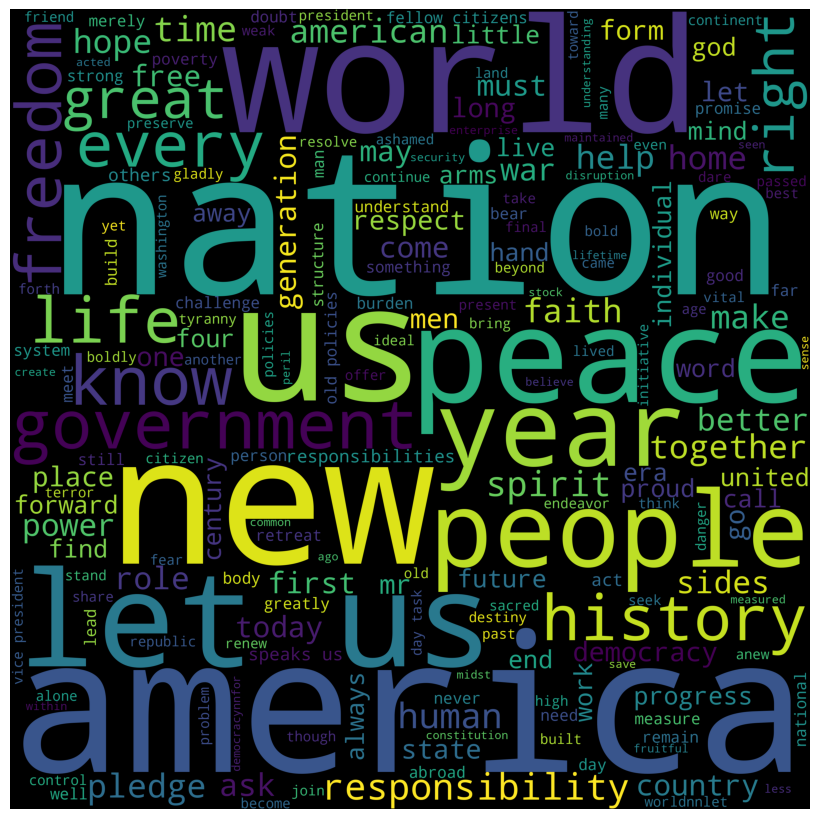

In [171]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 3000,
                background_color ='black',
                min_font_size = 10, random_state=100).generate(wc_a)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0)

print("Word Cloud for Speeches of leaders (after cleaning)!!")
plt.show()

In [172]:
df = pd.DataFrame(df['Speech'])

stop = set(stopwords.words('english'))

# Function to get stopwords and count
def get_stopwords_count(text):
    words = text.split()
    stopwords_in_text = [word for word in words if word.lower() in stop]
    return stopwords_in_text, len(stopwords_in_text)

# Apply the function to the DataFrame
df['stopwords'], df['stopwords_count'] = zip(*df['Speech'].apply(get_stopwords_count))

# Display the DataFrame with stopwords and their count
print(df[['Speech', 'stopwords', 'stopwords_count']])

                                              Speech stopwords  \
0  national day inauguration since 1789 people re...        []   
1  vice president johnson mr speaker mr chief jus...        []   
2  mr vice president mr speaker mr chief justice ...        []   

   stopwords_count  
0                0  
1                0  
2                0  


In [173]:
df['Speech'][0]

'national day inauguration since 1789 people renewed sense dedication united statesnnin washingtons day task people create weld together nationnnin lincolns day task people preserve nation disruption withinnnin day task people save nation institutions disruption withoutnnto us come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inactionnnlives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure livennthere men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tidennbut americans know truenneight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisivelynnthese later years living years fruitful years people democracy brought us greater security hope better understandin

In [174]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [175]:
inaugural.raw('1961-Kennedy.txt')

'Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens, we observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn I before you and Almighty God the same solemn oath our forebears l prescribed nearly a century and three quarters ago.\n\nThe world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.\n\nWe dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new gener

In [176]:
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [177]:
text = inaugural.words('1973-Nixon.txt')

In [178]:
char_number_nixon = len(text)
char_number_nixon

2028

In [179]:
num_sentences_nixon = text.count('.') + text.count('?') + text.count('!')
num_sentences_nixon

71

In [180]:
print('number of characters in nixon text messages are : ', char_number_nixon)
print('number of sentences in nixon text messages are : ', num_sentences_nixon)

number of characters in nixon text messages are :  2028
number of sentences in nixon text messages are :  71


In [181]:
text = inaugural.words('1941-Roosevelt.txt')

In [182]:
char_number_roosevolt = len(text)
char_number_roosevolt

1536

In [183]:
num_sentences_roosevolt = text.count('.') + text.count('?') + text.count('!')
num_sentences_roosevolt

67

In [184]:
print('number of characters in roosevolt text messages are : ', char_number_roosevolt)
print('number of sentences in roosevolt text messages are : ', num_sentences_roosevolt)

number of characters in roosevolt text messages are :  1536
number of sentences in roosevolt text messages are :  67


In [185]:
text = inaugural.words('1961-Kennedy.txt')

In [186]:
char_number_kennedy = len(text)
char_number_kennedy

1546

In [187]:
num_sentences_kennedy = text.count('.') + text.count('?') + text.count('!')
num_sentences_kennedy

53

In [188]:
print('number of characters in kennedy text messages are : ', char_number_kennedy)
print('number of sentences in kennedy text messages are : ', num_sentences_kennedy)

number of characters in kennedy text messages are :  1546
number of sentences in kennedy text messages are :  53


In [189]:
print(nltk.FreqDist(inaugural.words('1973-Nixon.txt')))
print(nltk.FreqDist(inaugural.words('1941-Roosevelt.txt')))
print(nltk.FreqDist(inaugural.words('1961-Kennedy.txt')))

<FreqDist with 545 samples and 2028 outcomes>
<FreqDist with 527 samples and 1536 outcomes>
<FreqDist with 570 samples and 1546 outcomes>


In [190]:
nltk.FreqDist(inaugural.words('1973-Nixon.txt'))

FreqDist({',': 96, 'the': 80, '.': 68, 'of': 68, 'to': 65, 'in': 54, 'and': 47, 'we': 38, 'a': 34, 'that': 32, ...})

In [191]:
nltk.FreqDist(inaugural.words('1941-Roosevelt.txt'))

FreqDist({'the': 104, 'of': 81, ',': 77, '.': 67, 'and': 44, 'to': 35, 'in': 30, 'a': 29, '--': 25, 'is': 24, ...})

In [192]:
nltk.FreqDist(inaugural.words('1961-Kennedy.txt'))

FreqDist({',': 85, 'the': 83, 'of': 65, '.': 51, 'to': 38, 'and': 37, 'a': 29, 'we': 27, '--': 25, 'in': 24, ...})

In [193]:
nltk.FreqDist(inaugural.words('1973-Nixon.txt')).most_common(30)

[(',', 96),
 ('the', 80),
 ('.', 68),
 ('of', 68),
 ('to', 65),
 ('in', 54),
 ('and', 47),
 ('we', 38),
 ('a', 34),
 ('that', 32),
 ('for', 32),
 ('our', 31),
 ('us', 26),
 ('America', 21),
 ('as', 20),
 ('peace', 19),
 ('by', 18),
 ('will', 18),
 ('world', 17),
 ('--', 17),
 ('be', 16),
 ('have', 16),
 ('new', 15),
 ('not', 15),
 ('is', 14),
 ('can', 14),
 ("'", 14),
 ('s', 14),
 ('do', 14),
 ('Let', 13)]

In [194]:
nltk.FreqDist(inaugural.words('1941-Roosevelt.txt')).most_common(30)

[('the', 104),
 ('of', 81),
 (',', 77),
 ('.', 67),
 ('and', 44),
 ('to', 35),
 ('in', 30),
 ('a', 29),
 ('--', 25),
 ('is', 24),
 ('that', 22),
 ('we', 22),
 ('it', 15),
 ('our', 14),
 ('It', 13),
 ('this', 12),
 ('not', 11),
 ('all', 11),
 ('has', 10),
 ('The', 10),
 ('know', 10),
 ('We', 10),
 ('have', 9),
 ('its', 9),
 ('spirit', 9),
 ('life', 9),
 ('because', 9),
 ('from', 8),
 ('us', 8),
 ('by', 8)]

In [195]:
nltk.FreqDist(inaugural.words('1961-Kennedy.txt')).most_common(30)

[(',', 85),
 ('the', 83),
 ('of', 65),
 ('.', 51),
 ('to', 38),
 ('and', 37),
 ('a', 29),
 ('we', 27),
 ('--', 25),
 ('in', 24),
 ('our', 21),
 ('that', 20),
 ('not', 19),
 ('for', 13),
 ('us', 12),
 ('this', 11),
 ('both', 10),
 ('are', 9),
 ('but', 8),
 ('world', 8),
 ('all', 8),
 ('Let', 8),
 ('it', 8),
 ('any', 8),
 ('do', 8),
 ('can', 8),
 ('let', 8),
 ('sides', 8),
 ('you', 7),
 ('is', 7)]

Problem 2 - Text cleaning

In [196]:
import numpy as np
import pandas as pd
import nltk
from nltk.stem.snowball import SnowballStemmer
import json
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer

In [197]:
stopwords = nltk.corpus.stopwords.words('english') +list(string.punctuation)

In [198]:
stemmer = SnowballStemmer("english")
stemmer

In [199]:
def myTokenizer(text):
    temp_tokens = [word for word in nltk.word_tokenize(text)]
    tokens = []
    for token in temp_tokens:
        if re.search('[a-zA-Z]', token):
            tokens.append(token)
    ret_tokens = [stemmer.stem(t) for t in tokens]
    return ret_tokens

In [200]:
synopses[0]

NameError: name 'synopses' is not defined

In [ ]:
all_words = []
def lower(x):
    for w in x.words():
        words=w.lower()
        all_words.append(words)

lower(inaugural)
all_words

In [ ]:
import string
stopwords=nltk.corpus.stopwords.words('english')+list(string.punctuation)

In [ ]:
print(stopwords)

In [ ]:
all_words_clean=[]
def clean(x):
    for word in x:
        if word not in stopwords:
            all_words_clean.append(word)

clean(all_words)
all_words_clean

In [ ]:
all_words_freq=nltk.FreqDist(all_words_clean)
all_words_freq

In [ ]:
word_features = []
def common_features(x):
    for item in x.most_common(2000):
        word_features.append(item[0])

common_features(all_words_freq)
word_features

In [ ]:
word_features[0:20]

In [ ]:
inaugural.categories()

In [ ]:
documents=[]
def docs(x):
    for category in x.categories():
        for fileid in x.fileids(category):
            documents.append((x.words(fileid),category))
docs(inaugural)